# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import re

from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [2]:
df = pd.read_csv('RUvideos.csv')

In [3]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,17.14.11,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40734,OMmR9THjVKM,18.14.06,У меня СДВГ! (Story booth на русском) Русская ...,Pastime Time,22,2018-06-13T13:47:01.000Z,"story booth на русском|""story booth перевод""|""...",129488,5893,164,990,https://i.ytimg.com/vi/OMmR9THjVKM/default.jpg,False,False,False,Котики в Blade and Soul - https://bit.ly/2JoOq...
40735,tX7p7NtNVDE,18.14.06,Мои Детские Травмы 2 (анимация),CaGArt,23,2018-06-12T09:38:38.000Z,"кагарт|""каги""|""цагарт""|""гагарт""|""какарт""|""милш...",99163,4659,337,692,https://i.ytimg.com/vi/tX7p7NtNVDE/default.jpg,False,False,False,Мои Детские Травмы 2 (анимация) ▶️Ск...
40736,KAyj5Xm1C64,18.14.06,[ENG SUB] BTS PROM PARTY 2018 Intro + 2nd Gran...,DaisyxBTS 07,24,2018-06-13T12:51:23.000Z,[none],449611,24808,93,974,https://i.ytimg.com/vi/KAyj5Xm1C64/default.jpg,False,False,False,***I do NOT own anything. Just want to share t...
40737,4PiSLIrsSiY,18.14.06,ОБЗОР ВАННОЙ КОМНАТЫ🛁/ТУАЛЕТНОЙ КОМНАТЫ🚽 + ДЕК...,Ксюша Лебедева,22,2018-06-13T00:23:33.000Z,"рум тур ванной комнаты|""room tour bathroom""|""д...",14225,793,39,209,https://i.ytimg.com/vi/4PiSLIrsSiY/default.jpg,False,False,False,"Обзор ванной комнаты, туалетной комнаты+ декор..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40739 entries, 0 to 40738
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40739 non-null  object
 1   trending_date           40739 non-null  object
 2   title                   40739 non-null  object
 3   channel_title           40739 non-null  object
 4   category_id             40739 non-null  int64 
 5   publish_time            40739 non-null  object
 6   tags                    40739 non-null  object
 7   views                   40739 non-null  int64 
 8   likes                   40739 non-null  int64 
 9   dislikes                40739 non-null  int64 
 10  comment_count           40739 non-null  int64 
 11  thumbnail_link          40739 non-null  object
 12  comments_disabled       40739 non-null  bool  
 13  ratings_disabled        40739 non-null  bool  
 14  video_error_or_removed  40739 non-null  bool  
 15  de

In [5]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m') # привёл дату к datetime, вдруг пригодится
df['publish_time'] = pd.to_datetime(df['publish_time']) # привёл дату к datetime, вдруг пригодится

In [6]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,2017-11-14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13 09:09:31+00:00,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,2017-11-14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13 17:32:11+00:00,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,2017-11-14,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13 16:11:31+00:00,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,2017-11-14,Сочная кесадилья с курицей,Hochland,22,2017-11-13 06:51:10+00:00,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,2017-11-14,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13 16:52:36+00:00,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40734,OMmR9THjVKM,2018-06-14,У меня СДВГ! (Story booth на русском) Русская ...,Pastime Time,22,2018-06-13 13:47:01+00:00,"story booth на русском|""story booth перевод""|""...",129488,5893,164,990,https://i.ytimg.com/vi/OMmR9THjVKM/default.jpg,False,False,False,Котики в Blade and Soul - https://bit.ly/2JoOq...
40735,tX7p7NtNVDE,2018-06-14,Мои Детские Травмы 2 (анимация),CaGArt,23,2018-06-12 09:38:38+00:00,"кагарт|""каги""|""цагарт""|""гагарт""|""какарт""|""милш...",99163,4659,337,692,https://i.ytimg.com/vi/tX7p7NtNVDE/default.jpg,False,False,False,Мои Детские Травмы 2 (анимация) ▶️Ск...
40736,KAyj5Xm1C64,2018-06-14,[ENG SUB] BTS PROM PARTY 2018 Intro + 2nd Gran...,DaisyxBTS 07,24,2018-06-13 12:51:23+00:00,[none],449611,24808,93,974,https://i.ytimg.com/vi/KAyj5Xm1C64/default.jpg,False,False,False,***I do NOT own anything. Just want to share t...
40737,4PiSLIrsSiY,2018-06-14,ОБЗОР ВАННОЙ КОМНАТЫ🛁/ТУАЛЕТНОЙ КОМНАТЫ🚽 + ДЕК...,Ксюша Лебедева,22,2018-06-13 00:23:33+00:00,"рум тур ванной комнаты|""room tour bathroom""|""д...",14225,793,39,209,https://i.ytimg.com/vi/4PiSLIrsSiY/default.jpg,False,False,False,"Обзор ванной комнаты, туалетной комнаты+ декор..."


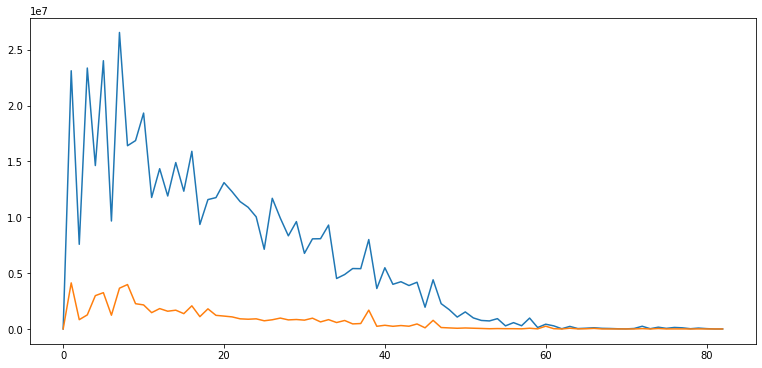

In [7]:
# я подумал посмотреть на связь (или её отсутствие) между кол-вом тегов и кол-вом лайков/дизлайков с помощью визуализации.
# к сожалению я понятия не имею зачем я это сделал и какие из этого можно сделать выводы.

def count_of_tags(tags_str):
    tags_list = re.findall('[A-zА-яё0-9 ]+', tags_str)
    return len(tags_list)

df['count_of_tags'] = df['tags'].apply(count_of_tags) # создал столбец с кол-вом тегов

likes_tags = df[['likes', 'count_of_tags']].groupby('count_of_tags').sum().reset_index()
dislikes_tags = df[['dislikes', 'count_of_tags']].groupby('count_of_tags').sum().reset_index()

plt.plot(likes_tags.likes)
plt.plot(dislikes_tags.dislikes)

In [8]:
df['category_id'].describe()

count    40739.000000
mean        20.261936
std          7.890955
min          1.000000
25%         20.000000
50%         22.000000
75%         25.000000
max         43.000000
Name: category_id, dtype: float64

In [9]:
def visualize_most(my_df, column, num=10): # getting the top 10 videos by default
    sorted_df = my_df.sort_values(column, ascending=False).iloc[:num]
    
    ax = sorted_df[column].plot.bar()
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in sorted_df['title']:
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()

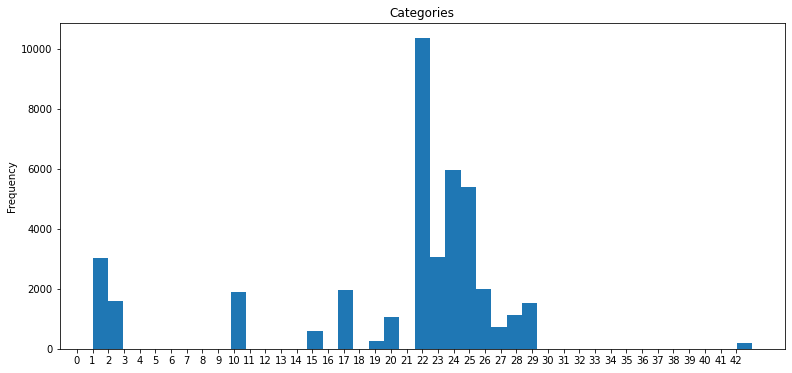

In [10]:
df['category_id'].plot(kind='hist', 
    title='Categories',
    bins=43,
    xticks=range(0, 43, 1))
plt.show()

# наглядно видно какие категории обычно в трендах, но я не уверен, что гистограмма это
# хорошая визуализация для таких данных

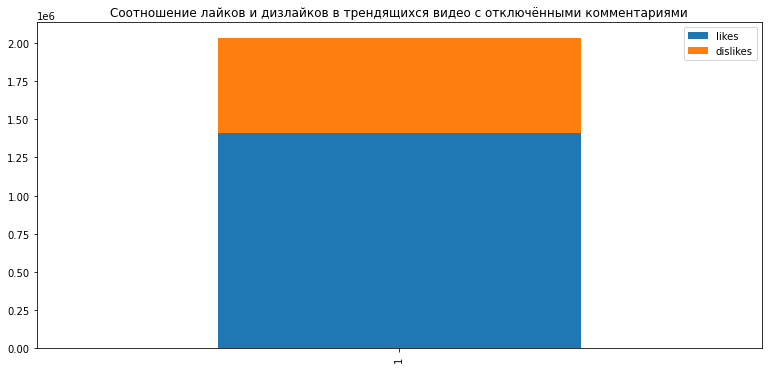

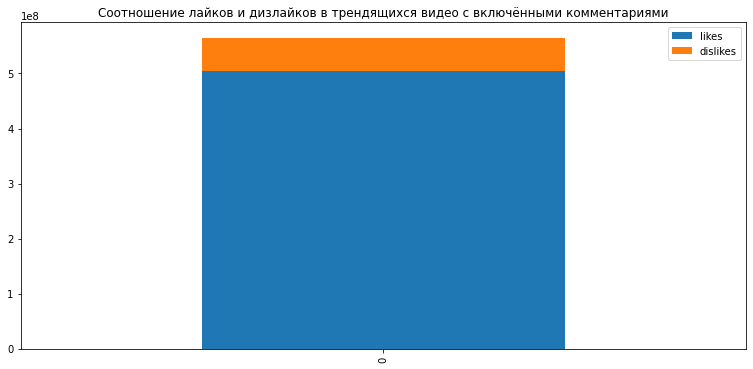

In [11]:
tmp = df[['likes', 'dislikes', 'comments_disabled']].groupby('comments_disabled').sum().reset_index()
tmp


likes_on_disabled_comments = tmp[tmp['comments_disabled'] == True]
likes_on_enabled_comments = tmp[tmp['comments_disabled'] == False]
likes_on_disabled_comments.plot(kind='bar', stacked=True, title='Соотношение лайков и дизлайков в трендящихся видео с отключёнными комментариями')
plt.show()
likes_on_enabled_comments.plot(kind='bar', stacked=True, title='Соотношение лайков и дизлайков в трендящихся видео с включёнными комментариями')
plt.show()

# в общем под видосами с отключёнными комментариями больше дизлайков.
# видимо потому что комментарии закрывают под неоднозначными видео, которые дизлайкают больше.
# и возможно из за того что комментарии закрыты ещё больше дизлайков наваливают.

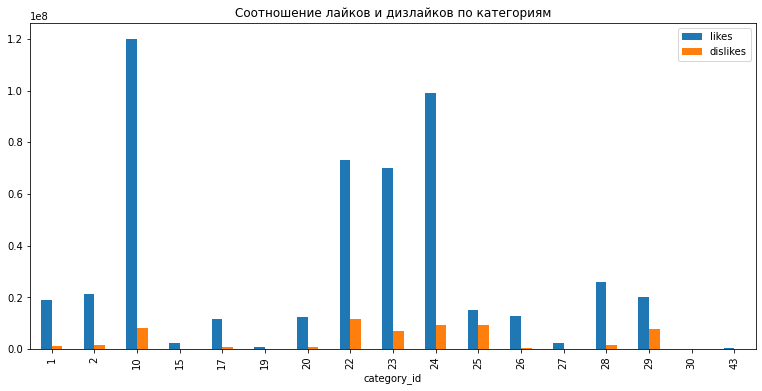

In [12]:
tmp = df[['likes', 'dislikes', 'category_id']].groupby('category_id').sum()

tmp.plot(kind='bar', 
    title='Соотношение лайков и дизлайков по категориям')
plt.show()

# тут я (если всё правильно сделал) пытаюсь посмотреть в каких категориях какое соотношение лайков/дизлайков.
# в категории "News & Politics" дизлайков прям много, это наверное потому что новости обычно негативные.
# в "Nonprofits & Activism" тоже довольно много дизлайков, наверное потому что активисты пытаются привлечь внимание порой
# неоднозначным образом и многие не любят активистов.

Text(0.6, 0.7, 'annotate')

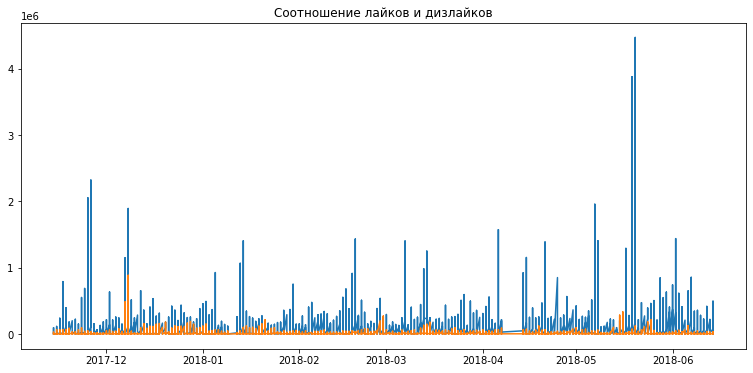

In [13]:
plt.plot(df.trending_date, df.likes)
plt.plot(df.trending_date, df.dislikes)
plt.title('Соотношение лайков и дизлайков')
# видосам в трендах лайков ставят заметно больше, чем дизлайков.
plt.annotate("annotate", xy=(0.2, 0.4), xytext=(0.6, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05))

Text(17667, 600000, 'А ето чо?')

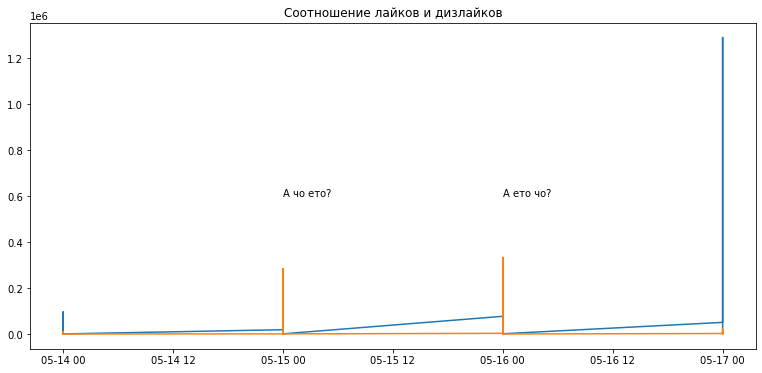

In [35]:
start_date = df["trending_date"] >= "2018-05-14"
end_date = df["trending_date"] <= "2018-05-17"
date_range = start_date & end_date
tmp = df.loc[date_range]

plt.plot(tmp.trending_date, tmp.likes)
plt.plot(tmp.trending_date, tmp.dislikes)
plt.title('Соотношение лайков и дизлайков')

plt.text(17666, 600000,'А чо ето?')
plt.text(17667, 600000,'А ето чо?')

# тип визуализации оказался неудачным, но тем не менее получилось понять в какую дату было аномально много дизлайков.
# интересно, что число даты в формате datetime заканчивается на 666 в день с аномальным числом дизлайков.
# совпадение или тёмные силы вмешались?

In [36]:
shity_videos = tmp[['likes','dislikes', 'video_id', 'title']].copy()
shity_videos['dislikes/likes perc'] = (df['dislikes'] / df['likes']) * 100

top5 = shity_videos.sort_values(by='dislikes/likes perc', ascending=False).head(5)
top5

# наверное правильнее было бы найти видео у которых топовое соотношение кол-ва дизлайков и процентов дизлайков от лайков.
# но я не уверен.

,likes,dislikes,video_id,title,dislikes/likes perc
34667,50,309,2A1jG9t7TQA,Юля Волкова в специальном выпуске Пусть Говоря...,618.000000
34660,1141,3842,SjNop-EOXyw,Матвей Ганапольский / Ганапольское: Итоги без ...,336.722174
34692,22,66,6JEpVdFYHKg,Diriliş Ertuğrul 118 Bölüm 2.Fragman,300.000000
35193,3396,9046,Zlninlq_g88,ЕСТЬ ЛИ ЖИЗНЬ ПОСЛЕ ПУ? (прямой эфир с А. Соко...,266.372203
34974,1321,3013,rp98v3WWzus,Особое мнение / Евгения Альбац // 15.05.18,228.084784


<AxesSubplot:xlabel='video_id'>

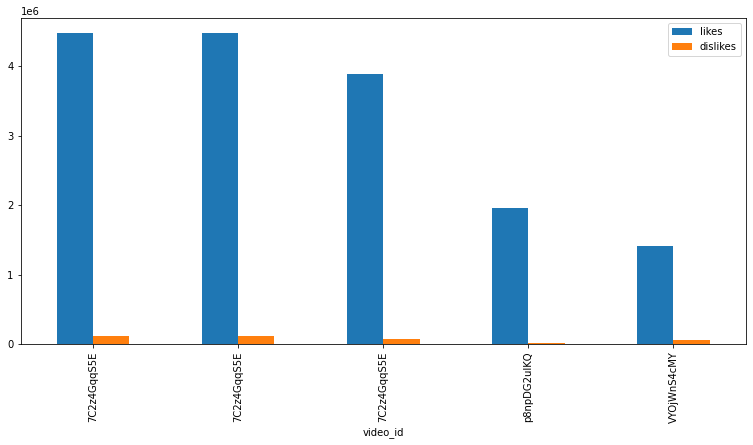

In [38]:
# это анамально залайканные видео за 19 и 20 мая 2018,
# как выяснилось это одно видео

start_date = df["trending_date"] >= "2018-05-4"
end_date = df["trending_date"] <= "2018-05-20"
date_range = start_date & end_date
tmp = df.loc[date_range]
tmp = tmp[['likes','dislikes', 'video_id', 'title']].copy()
tmp = tmp.set_index('video_id')

top5 = tmp.sort_values(by='likes', ascending=False).head(5)
ax = top5.plot(kind='bar')
ax

<AxesSubplot:title={'center':'Распределение по кол-ву попадений в тренды'}>

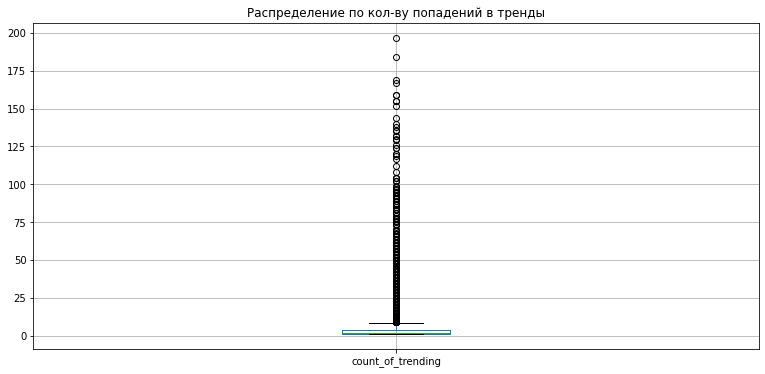

In [39]:
# поглядим, чьи видео чаще всего попадали в тренды
top_trenders = df.groupby(['channel_title']).size().reset_index(name='count_of_trending').sort_values(by='count_of_trending', ascending=False)

top_trenders.count_of_trending.plot(kind='box',
                   title='Распределение по кол-ву попадений в тренды', grid=True)

# как выяснилсоь в подавляющем большинстве случаев в тренды видео попадают не систематически от разных авторов.
# те авторы, кто регулярно тусуются в трендах -- могут считаться исключением

<AxesSubplot:title={'center':'Соотношение кол-ва лайков и частоты попадения в тренды по категориям'}, xlabel='category_id', ylabel='likes'>

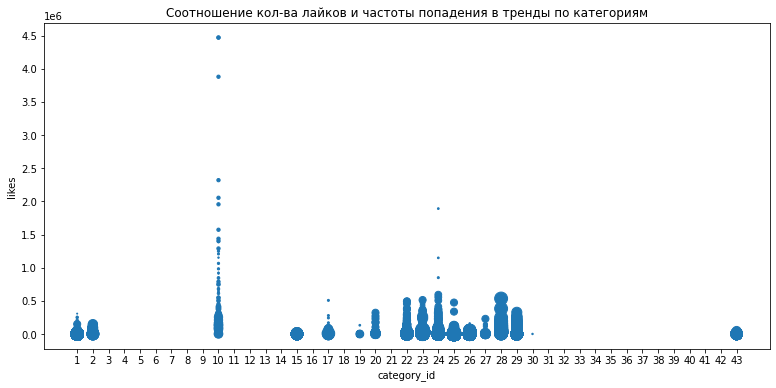

In [40]:
df_with_count_of_trending = df.merge(top_trenders, on='channel_title', how='left').sort_values('count_of_trending', ascending=False).reset_index()

df_with_count_of_trending.plot(kind='scatter', 
        x='category_id', 
        y='likes', 
        s=df_with_count_of_trending.count_of_trending,
        xticks=range(1, 44, 1),
        yticks=range(0, 5000000, 500000),
        title='Соотношение кол-ва лайков и частоты попадения в тренды по категориям',
       )

# как-то неинформативно выглядит